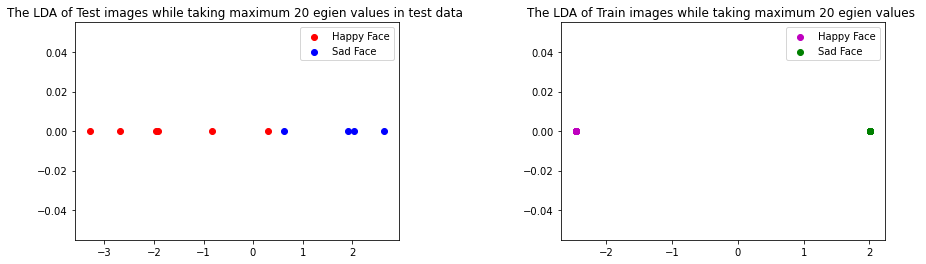

		The accuracy in test data by taking 20 eigen values and 2.24 threshold is 70.0 %
		The separability by taking first 20 eigen values in train data is [[3.33027762e+16]]


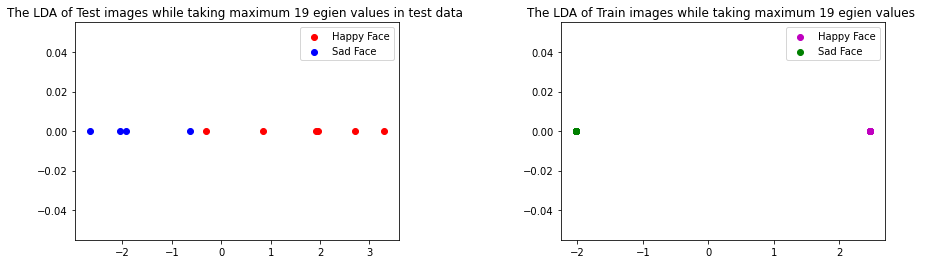

		The accuracy in test data by taking 19 eigen values and -2.25 threshold is 30.0 %
		The separability by taking first 19 eigen values in train data is [[4.82906303e+15]]


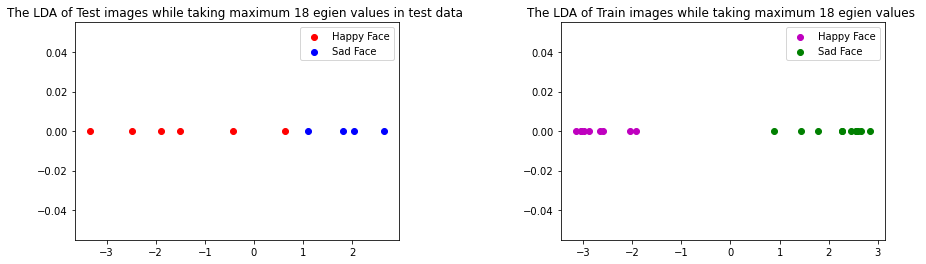

		The accuracy in test data by taking 18 eigen values and 1.41 threshold is 90.0 %
		The separability by taking first 18 eigen values in train data is [[4.64545706]]


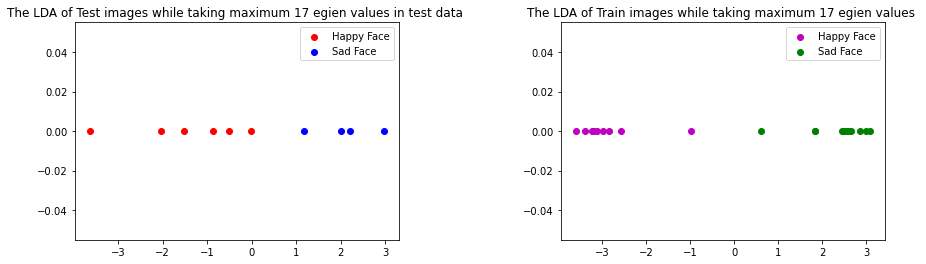

		The accuracy in test data by taking 17 eigen values and 0.79 threshold is 100.0 %
		The separability by taking first 17 eigen values in train data is [[2.79968188]]


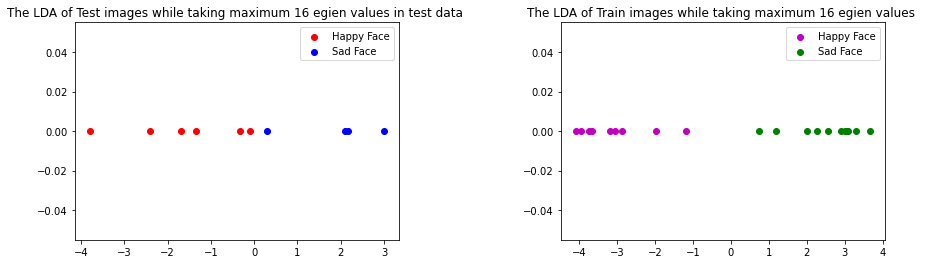

		The accuracy in test data by taking 16 eigen values and 0.96 threshold is 90.0 %
		The separability by taking first 16 eigen values in train data is [[2.00447578]]


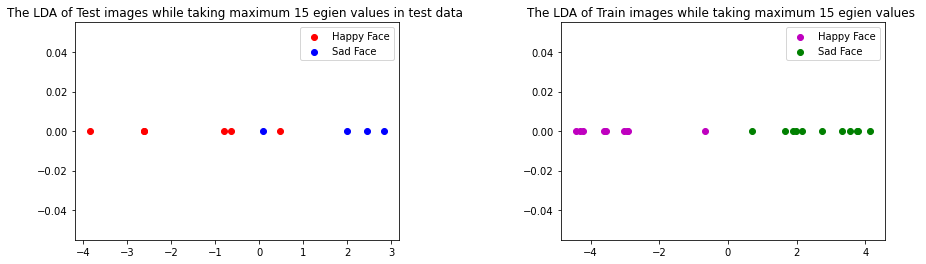

		The accuracy in test data by taking 15 eigen values and 0.69 threshold is 90.0 %
		The separability by taking first 15 eigen values in train data is [[1.59008015]]


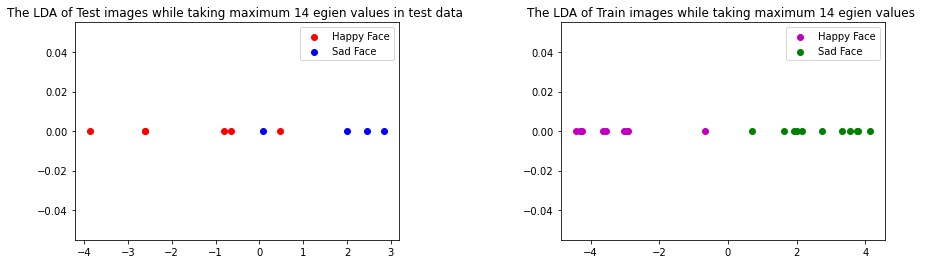

		The accuracy in test data by taking 14 eigen values and 0.68 threshold is 90.0 %
		The separability by taking first 14 eigen values in train data is [[1.58996428]]


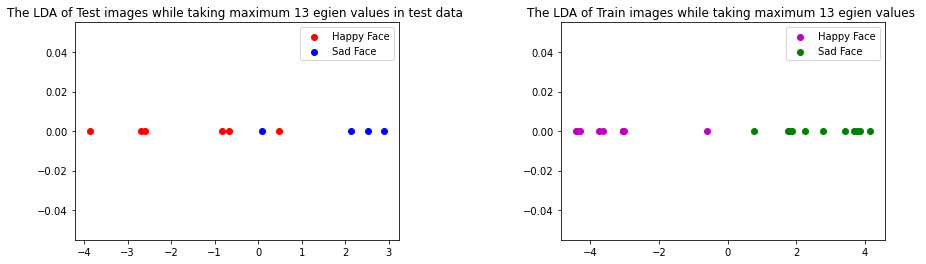

		The accuracy in test data by taking 13 eigen values and 0.7 threshold is 90.0 %
		The separability by taking first 13 eigen values in train data is [[1.57862074]]


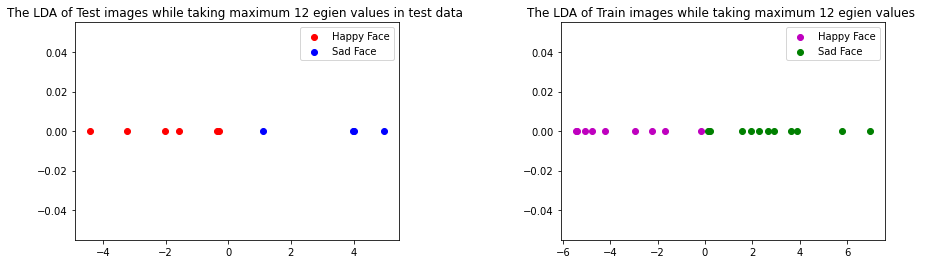

		The accuracy in test data by taking 12 eigen values and 0.16 threshold is 100.0 %
		The separability by taking first 12 eigen values in train data is [[0.57251807]]


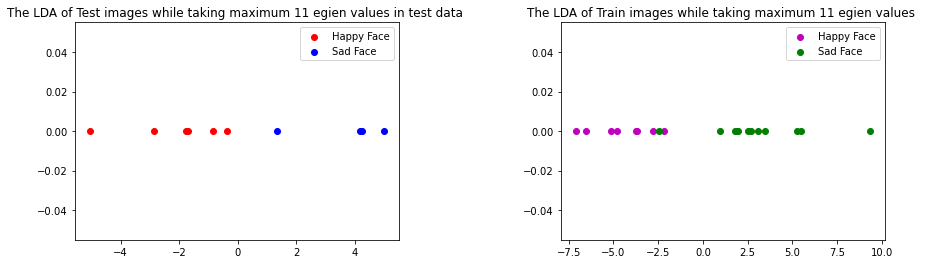

		The accuracy in test data by taking 11 eigen values and -2.2 threshold is 60.0 %
		The separability by taking first 11 eigen values in train data is [[0.32183952]]


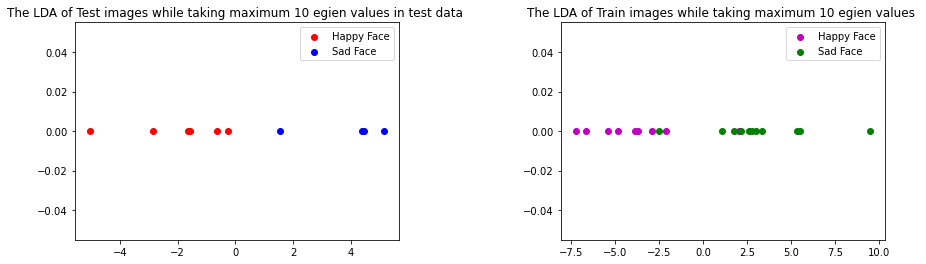

		The accuracy in test data by taking 10 eigen values and -2.26 threshold is 60.0 %
		The separability by taking first 10 eigen values in train data is [[0.32133051]]


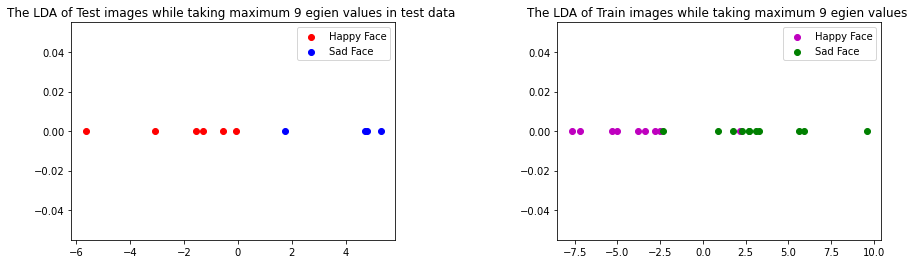

		The accuracy in test data by taking 9 eigen values and -2.24 threshold is 60.0 %
		The separability by taking first 9 eigen values in train data is [[0.31886896]]


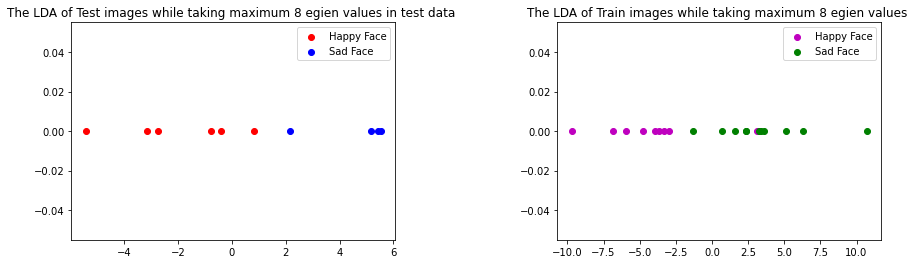

		The accuracy in test data by taking 8 eigen values and -2.21 threshold is 70.0 %
		The separability by taking first 8 eigen values in train data is [[0.30011326]]


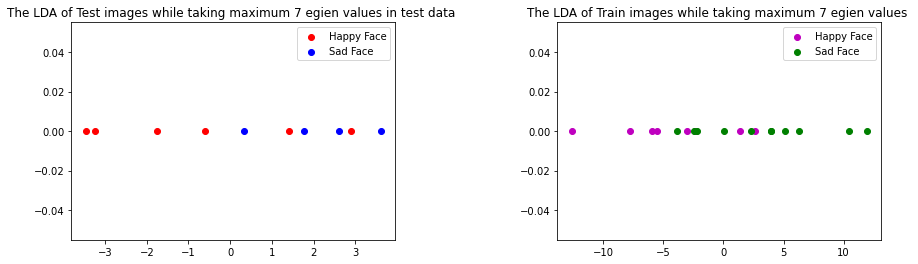

		The accuracy in test data by taking 7 eigen values and -3.25 threshold is 50.0 %
		The separability by taking first 7 eigen values in train data is [[0.11753593]]


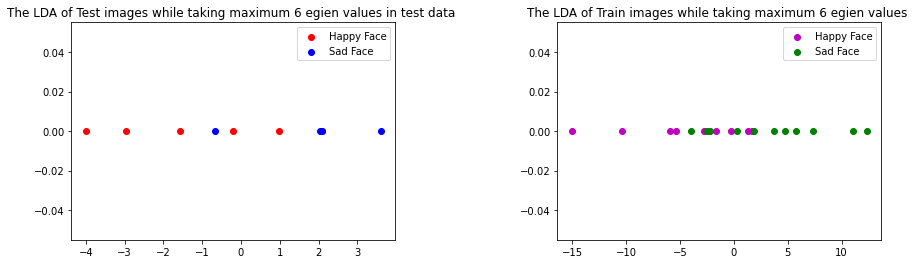

		The accuracy in test data by taking 6 eigen values and -2.84 threshold is 60.0 %
		The separability by taking first 6 eigen values in train data is [[0.11130103]]


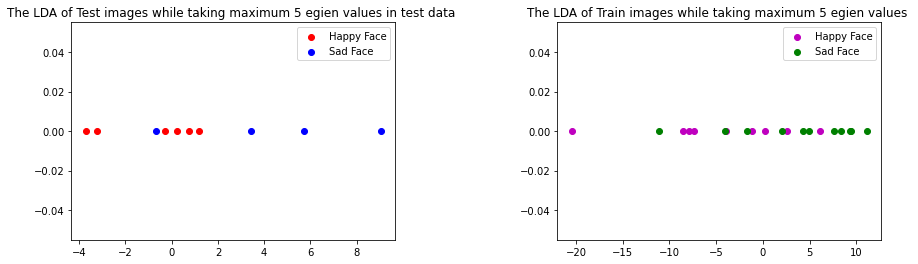

		The accuracy in test data by taking 5 eigen values and -8.63 threshold is 40.0 %
		The separability by taking first 5 eigen values in train data is [[0.06934257]]


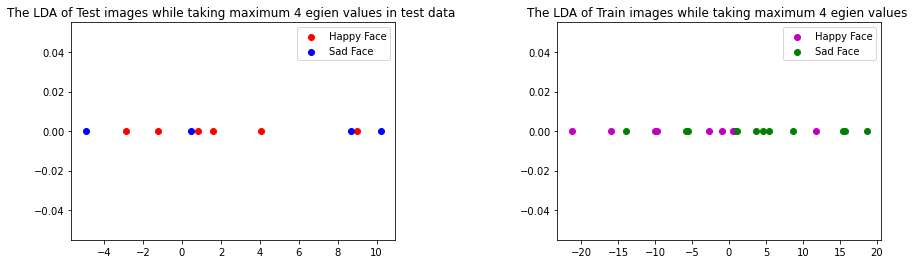

		The accuracy in test data by taking 4 eigen values and -12.86 threshold is 40.0 %
		The separability by taking first 4 eigen values in train data is [[0.05075856]]


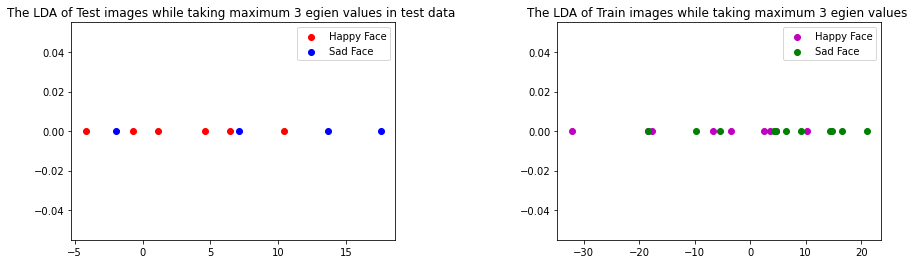

		The accuracy in test data by taking 3 eigen values and -14.31 threshold is 40.0 %
		The separability by taking first 3 eigen values in train data is [[0.04525362]]


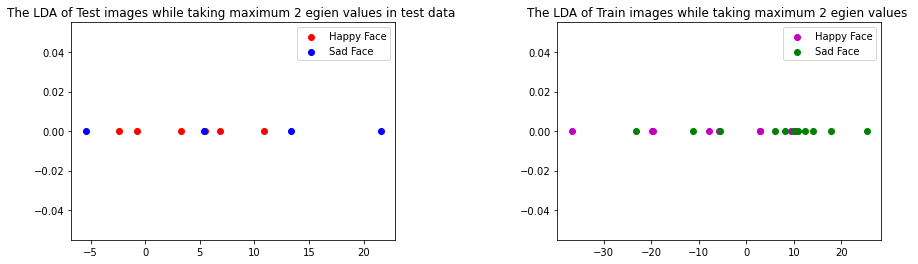

		The accuracy in test data by taking 2 eigen values and -16.62 threshold is 40.0 %
		The separability by taking first 2 eigen values in train data is [[0.04366563]]


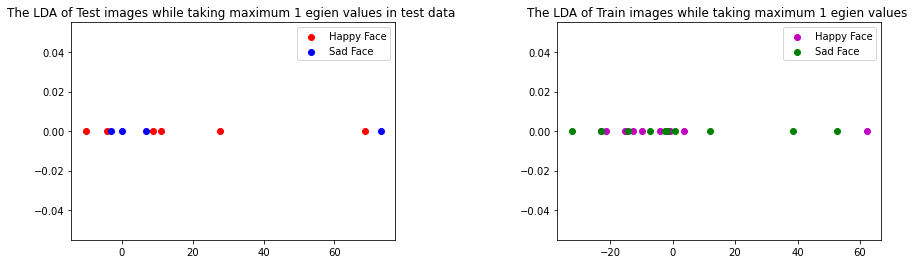

		The accuracy in test data by taking 1 eigen values and -47.12 threshold is 40.0 %
		The separability by taking first 1 eigen values in train data is [[0.00159529]]


In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import numpy as np
import math
import os
import imageio
np.set_printoptions(threshold=np.inf)
image_path = r"./train/"
train_data = os.listdir(image_path)
X=np.zeros([10201,len(train_data)],dtype='float64') #matrix to store feature vectors
X=np.matrix(X)
for i in range(len(train_data)):
    image=imageio.imread(image_path+train_data[i])
    image=np.reshape(image,(10201,1))
    X[:,i]=image
imgmean=np.mean(X,axis=1).reshape(10201,1)
X=X-imgmean  
S=(X.transpose()@X)/20
eigenvalues,eigenvectors=np.linalg.eig(S)
idx = eigenvalues.argsort()[::-1]   
eigen = eigenvalues[idx] # lamda 
eigenvec = eigenvectors[:,idx]
for j in range(20,0,-1):
    U=np.empty((10201,j),dtype='float64')
    U=np.matrix(U)
    for i in range(0,j):
        U[:,i]=((X@eigenvec[:,i])/(np.sqrt(20*abs(eigen[i])))).reshape(10201,1)
        U[:,i]=U[:,i]/np.linalg.norm(U[:,i],1)
    PCA_value=U.transpose()@X
    class1=[]
    class2=[]
    for name in range(len(train_data)):
        if ((train_data[name].split('.'))[1])=='happy':
            class1.append(name)
        else:
            class2.append(name)
    Xhappy=np.matrix(np.empty((j,len(class1)),dtype='float64'))   
    dumy=0
    for index in class1:
        Xhappy[:,dumy]=PCA_value[:,index]
        dumy=dumy+1
    XSad=np.matrix(np.empty((j,len(class2)),dtype='float64'))   
    dumy2=0 
    for index in class2:
        XSad[:,dumy2]=PCA_value[:,index] 
        dumy2=dumy2+1
    Xhappy_mean=np.mean(Xhappy,axis=1).reshape(j,1)    
    XSad_mean=np.mean(XSad,axis=1).reshape(j,1)
    S_b=(XSad_mean-Xhappy_mean)@np.transpose((XSad_mean-Xhappy_mean))
    S_W=np.zeros([j,j])
    for index in range(Xhappy.shape[1]):
        S_W+=((Xhappy[:,index]-Xhappy_mean)@(np.transpose((Xhappy[:,index]-Xhappy_mean))))
    for index in range(XSad.shape[1]):
        S_W+=((XSad[:,index]-XSad_mean)@(np.transpose((XSad[:,index]-XSad_mean))))    
    W=np.linalg.inv(S_W)@S_b 
    happy_out=np.zeros([1,Xhappy.shape[1]])
    direc=np.linalg.inv(S_W)@(XSad_mean-Xhappy_mean)
    direc=direc/np.linalg.norm(direc,1)
    for i in range(Xhappy.shape[1]):
        happy_out[0,i]=np.transpose(direc)@Xhappy[:,i]
    Sad_out=np.zeros([1,XSad.shape[1]])
    for i in range(XSad.shape[1]):
        Sad_out[0,i]=np.transpose(direc)@XSad[:,i]
    h1=np.zeros([1,Xhappy.shape[1]])
    h2=np.zeros([1,XSad.shape[1]])
    J=(direc.T@S_b)@direc/((direc.T@S_W)@direc)
    thresh=(Sad_out.min()-happy_out.max())/2


    
    
    image_path = r"./test/"
    test_data = os.listdir(image_path)
    X_test=np.zeros([10201,len(test_data)],dtype='float64') #matrix to store feature vectors
    X_test=np.matrix(X_test)
    for i in range(len(test_data)):
        image=imageio.imread(image_path+test_data[i])
        image=np.reshape(image,(10201,1))
        X_test[:,i]=image
    X_test=X_test-imgmean
    PCA_value_test=np.matrix(U.transpose()@X_test)
    class1_test=[]
    class2_test=[]
    for name in range(len(test_data)):
        if ((test_data[name].split('.'))[1])=='happy':
            class1_test.append(name)
        else:
            class2_test.append(name)
    Xhappy_test=np.matrix(np.empty((j,len(class1_test)),dtype='float64')) 
    dumy=0
    for index in class1_test:
        Xhappy_test[:,dumy]=PCA_value_test[:,index]
        dumy=dumy+1
    XSad_test=np.matrix(np.empty((j,len(class2_test)),dtype='float64'))   
    dumy2=0 
    for index in class2_test:
        XSad_test[:,dumy2]=PCA_value_test[:,index] 
        dumy2=dumy2+1
    happy_out_test=np.zeros([1,Xhappy_test.shape[1]])
    Sad_out_test=np.zeros([1,XSad_test.shape[1]])
    for i in range(Xhappy_test.shape[1]):
        happy_out_test[0,i]=np.transpose(direc)@Xhappy_test[:,i]
    for i in range(XSad_test.shape[1]):
        Sad_out_test[0,i]=np.transpose(direc)@XSad_test[:,i]
    Predict_data=np.matrix(np.transpose(direc)@PCA_value_test)
    Predict_data_happy=[]
    Predict_data_sad=[]
    for pox in class1_test:
        Predict_data_happy.append(Predict_data[0,pox])
    for pox in class2_test:
        Predict_data_sad.append(Predict_data[0,pox])
    flag=0
    for i in range(len(Predict_data_happy)):
        if Predict_data_happy[i]<thresh:
            flag=flag+1
    for i in range(len(Predict_data_sad)):
        if Predict_data_sad[i]>thresh:
            flag=flag+1
    accuracy=(flag/len(test_data))*100
    plt.subplot(1,2,1)
    h1_test=np.zeros([1,len(Predict_data_happy)])
    h2_test=np.zeros([1,len(Predict_data_sad)])
    plt.title(f"The LDA of Test images while taking maximum {j} egien values in test data ")
    plt.scatter(Predict_data_happy,h1_test,c='r')
    plt.scatter(Predict_data_sad,h2_test,c='b')
    plt.legend(['Happy Face','Sad Face'])
    plt.subplot(1,2,2)
    plt.title(f"The LDA of Train images while taking maximum {j} egien values ")
    plt.scatter(happy_out,h1,c='m')
    plt.scatter(Sad_out,h2,c='g')
    plt.legend(['Happy Face','Sad Face'])
    plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=0.5, hspace=None)
    plt.show()
    print("\t\tThe accuracy in test data by taking {} eigen values and {} threshold is {} %".format(j,round(thresh,2),accuracy))
    print("\t\tThe separability by taking first {} eigen values in train data is {}".format(j,J))

    
    
   
    
    
